In [5]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

서브플롯 만들기 

fig 파라미터1, ax 파라미터2 = plt.subplot(행,열)
2행 3열을 구성하는데 파라미터1 객체는 그래픽 처리, 파라미터2 분할된 각 그래프 영역(리스트)
한개의 plot 만드는 것에서 함수 이름이 다 변한다고 봐야함.... TT
wspace는 각 그래프간의 간격을 말한다.


파라미터가 하나씩 더 들어가는데 이는 그래프가 들어갈 위치를 말한다.





In [2]:
df = read_excel("http://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

## 서브플롯 영역 나누기

2행 3열을 갖는 서브플롯 영역 생성하기

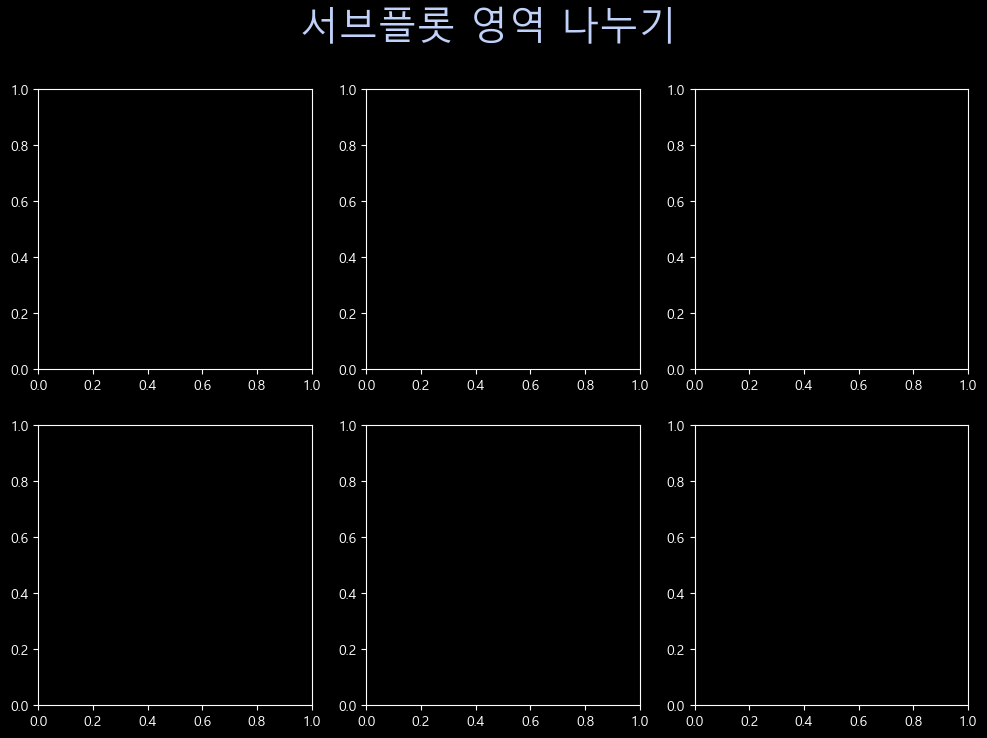

In [17]:
# 서브플롯 생성 --> 2행 3열
# -> fig객체: 그래픽 처리 기능을 제공
# -> ax객체: 분할된 각 그래프 영역(리스트)
fig, ax = plt.subplots(2,3)

# 전체제목
fig.suptitle('서브플롯 영역 나누기',fontsize=28,color='#c0d2fa')

# 각 그래프 간의 가로, 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.2)

plt.show()
plt.close()

## 서브플롯에 그래프 그리기

2행 2열의 영역을 생성한다 
 - ax에 반환되는 객체는 서브플롯의 행, 열에 대한 n차원 리스트다.
 - figsize 파라미터는 그래픽의 크기 plt.rcParams['figure.figsize] 설정보다 우선한다.
 
- a, b = [[1,2],[3,4]]
- a == [1,2], b == [3,4]
- (a,c),(b,d) = [[1,2],[3,4]]
- a==1,c==2....


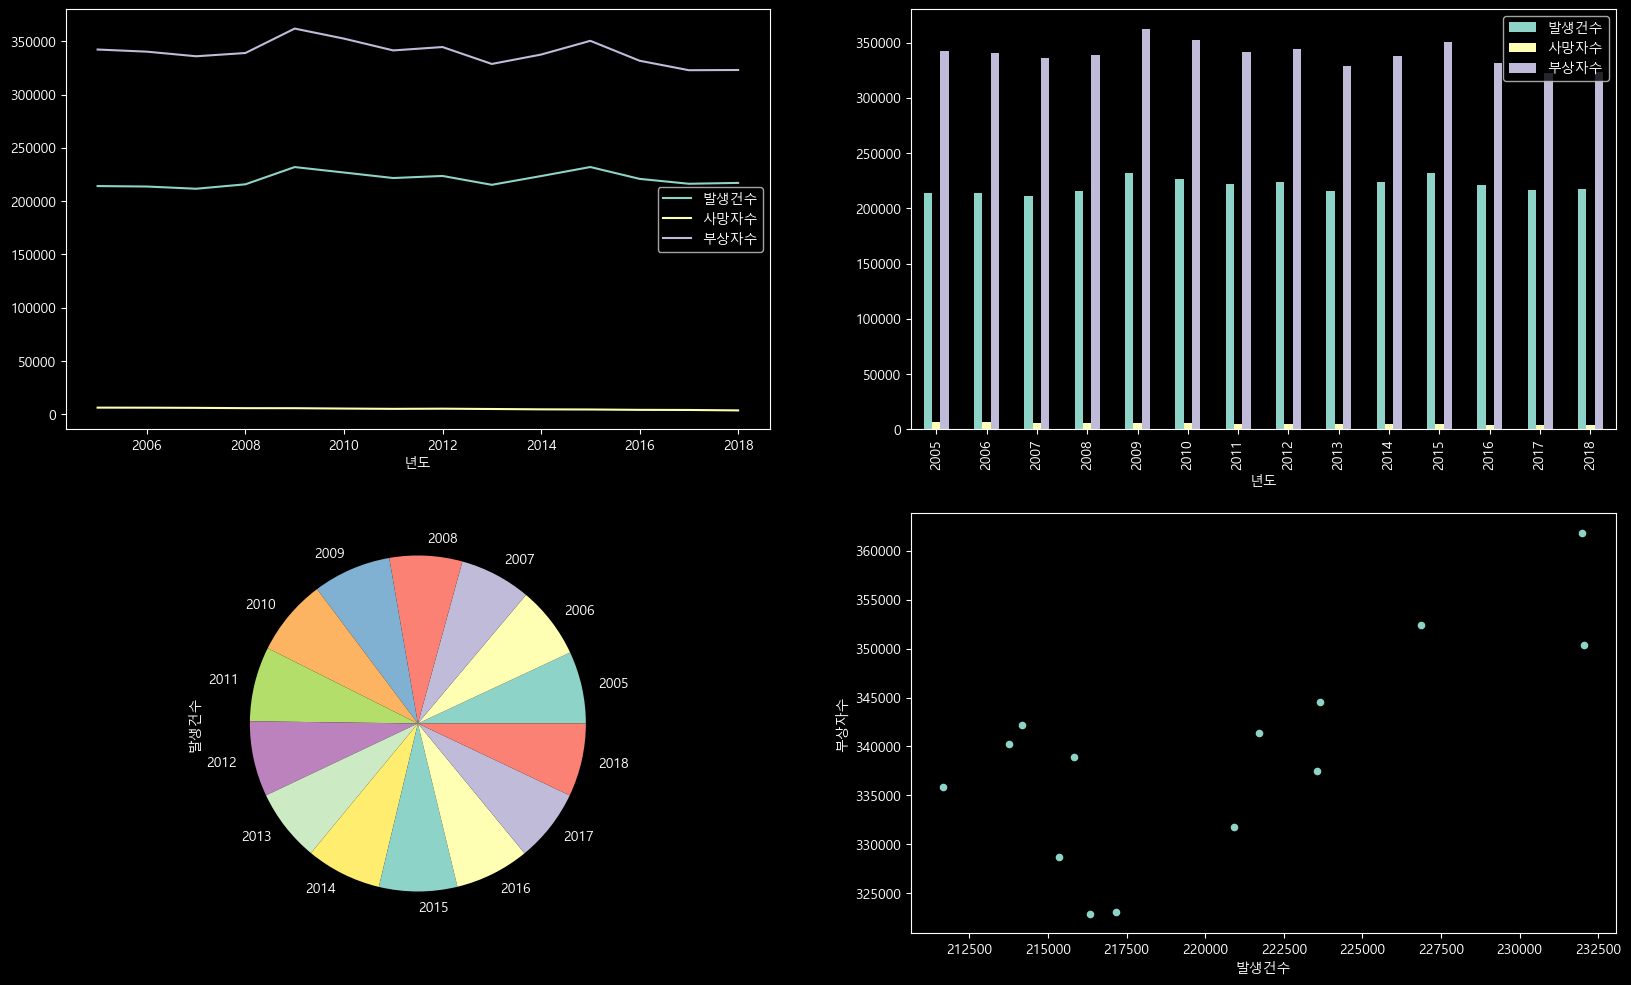

In [20]:
fig, ax = plt.subplots(2,2, figsize=(20,12))
# figsize는 그래픽의 크기이며 rcParamas보다 우선한다. 

# 데이터 프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax=ax[0][0])
df.plot.bar(ax=ax[0][1])
df['발생건수'].plot.pie(ax=ax[1][0])
df.plot.scatter(x='발생건수',y='부상자수',ax=ax[1][1])

plt.show()
plt.close()

## 서브플롯 영역에 옵션 지정하기

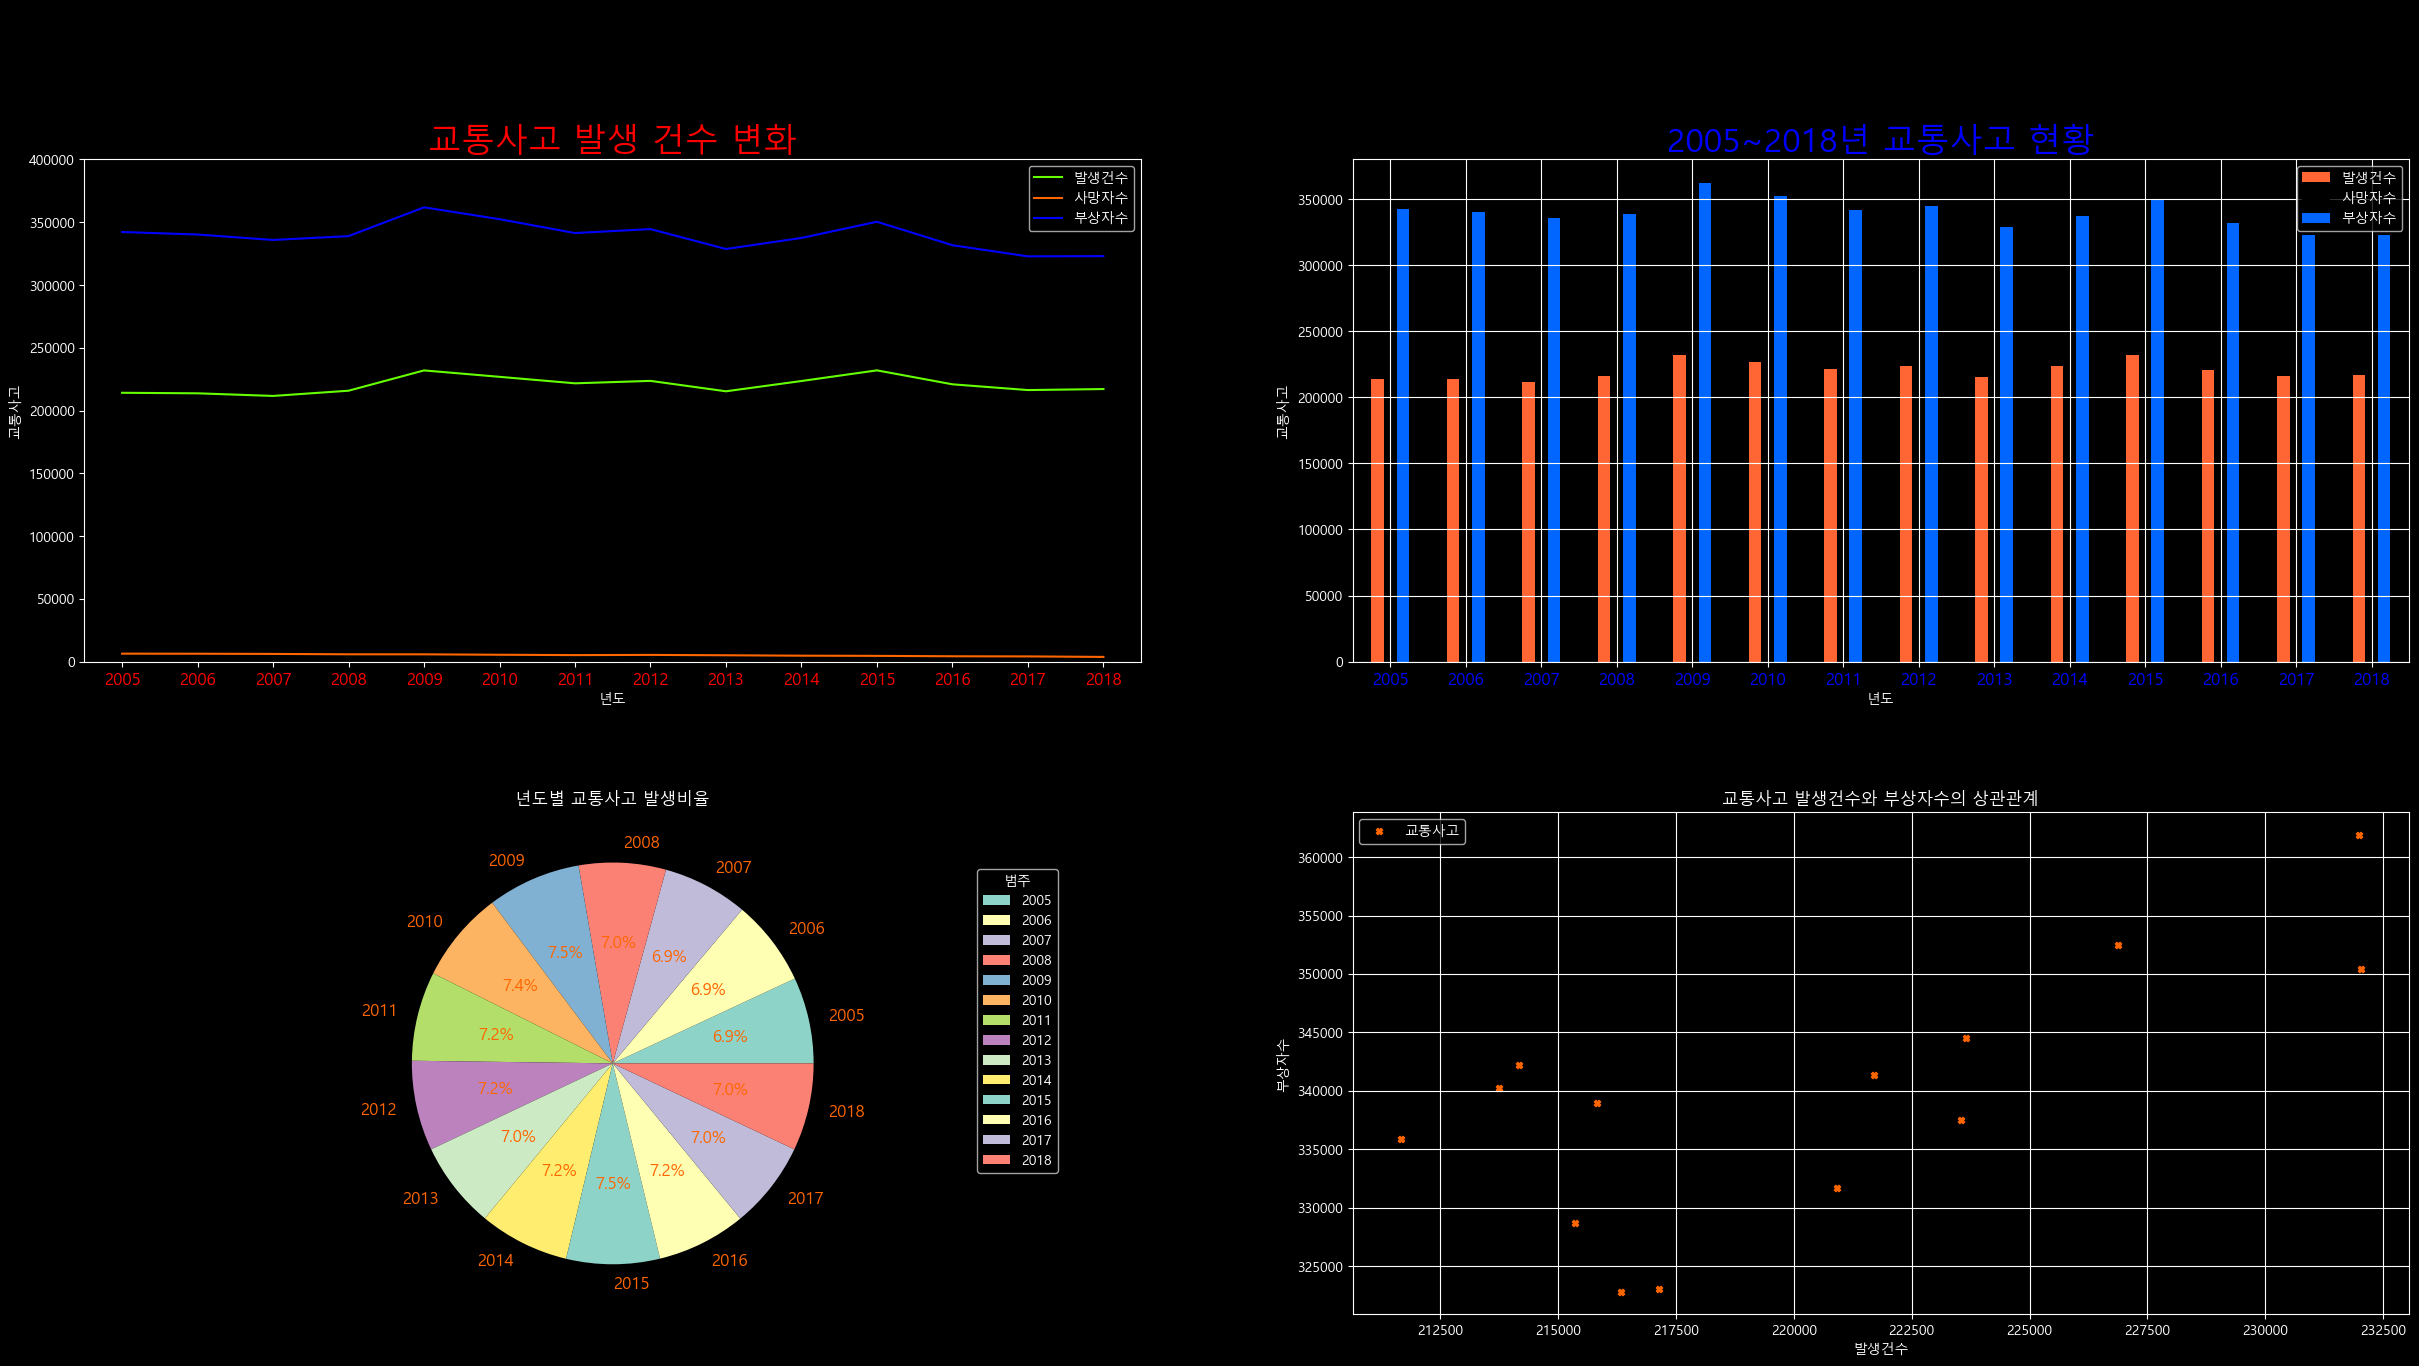

In [42]:
# 2행 2열의 영역을 생성한다
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 15))

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# --------------------------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
df.plot(ax=ax1, color=['#66ff00', '#ff6600', '#0000ff'])

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# plt을 직접 사용할 경우 xticks(x축좌표, 표시할_텍스트) 형식으로 지정 하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
start = min(df.index)
end = max(df.index)
x = list(range(start, end+1))
# -> 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax1.set_xticklabels(df.index, fontsize=12, color='#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 400000])

# --------------------------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
df.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(df.index, fontsize=12, color='#0000ff')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel='년도', ylabel='교통사고')
# --------------------------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct="%0.1f%%", 
                        textprops={'color':"#ff6600", 'fontsize': 12})

# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생비율")

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=df.index, title='범주', bbox_to_anchor=(1.4, 0.9))
# 범주 들어가는 자리 bbox_to_anchor =(x좌표,y좌표)

# --------------------------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
# 산점도 그래프
df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color='#ff6600', marker='X', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축,y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')
# --------------------------------------------------------------------------------
plt.show()
plt.close()






## 두 개의 y축을 갖는 그래프

In [21]:
# x축 데이터(공용)
x = list(range(0,10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
# 첫번째 y축 데이터
y1 = list(range(0,10,1))
# 두번째 y축 데이터
y2 = list(np.arange(0, 5, 0.5))

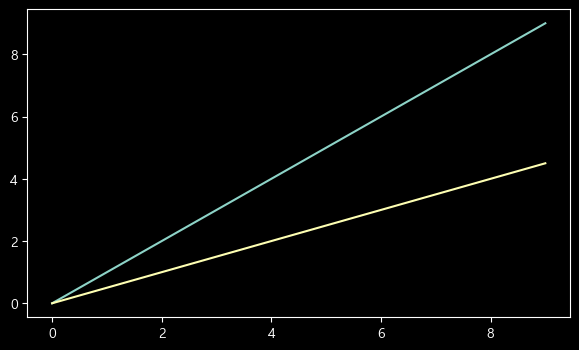

In [25]:

# 기본 그래프 구현
plt.rcParams['figure.figsize'] = (7,4)
plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.close()

서브플롯으로 2개의 y축을 갖는 그래프 구현

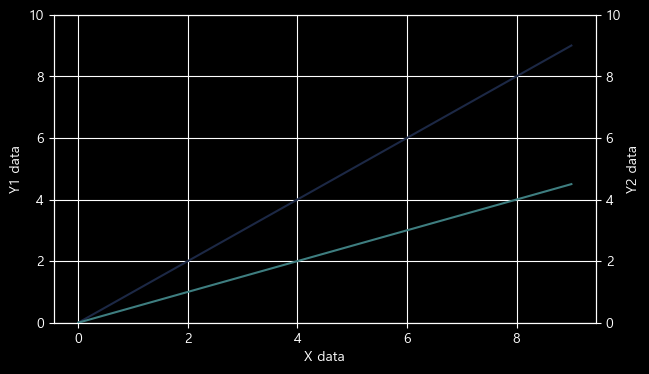

In [31]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성한다
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x,y1,color='#1c2845')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data',color='#ffffff')
ax1.grid()
ax1.set_ylim([0,10])

# ax2에 그래프 그리기
ax2.plot(x,y2,color='#3e7e80')
ax2.set_ylabel('Y2 data',color='#ffffff')
ax2.set_ylim([0,10])

plt.show()
plt.close()

### 예제) 교통 사고 발생건수와 사망자수 변화 시각화하기
우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령을 개정한 이후 꾸준히 교통사고 안전기준을 강화해왔다. 이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었을까? 그래프를 통해 분석해보자.


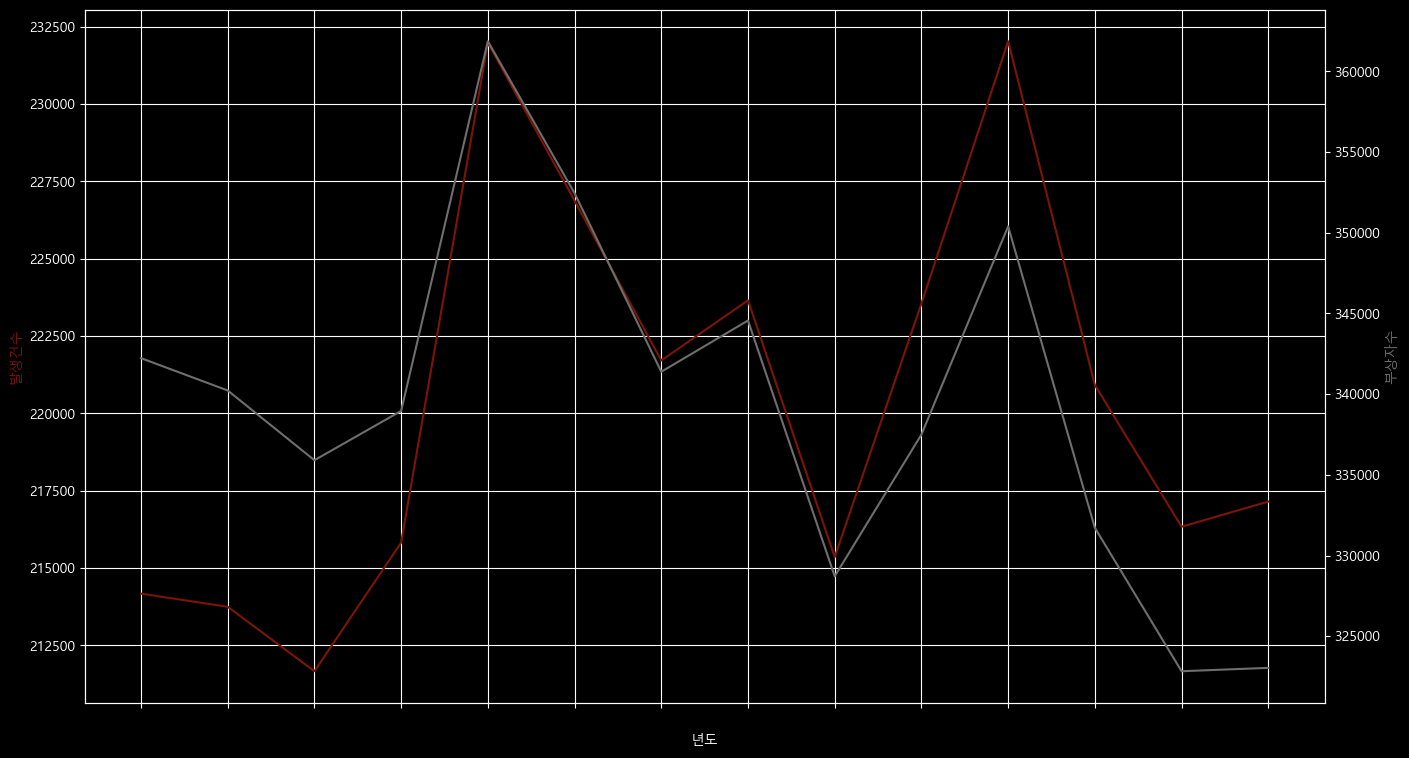

In [32]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9)) # 그래프 시작
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1,color='#7d1505')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수',color='#7d1505')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(df.index)
end =  max(df.index)
ax1.set_xticks(list(range(start,end+1)))
ax1.set_xticklabels(df.index, fontsize=12,color='#000000')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2, color='#6e6e6e')
ax2.set_ylabel('부상자수',color='#6e6e6e')

plt.show()
plt.close()